# Mask and Social distancing Detection 

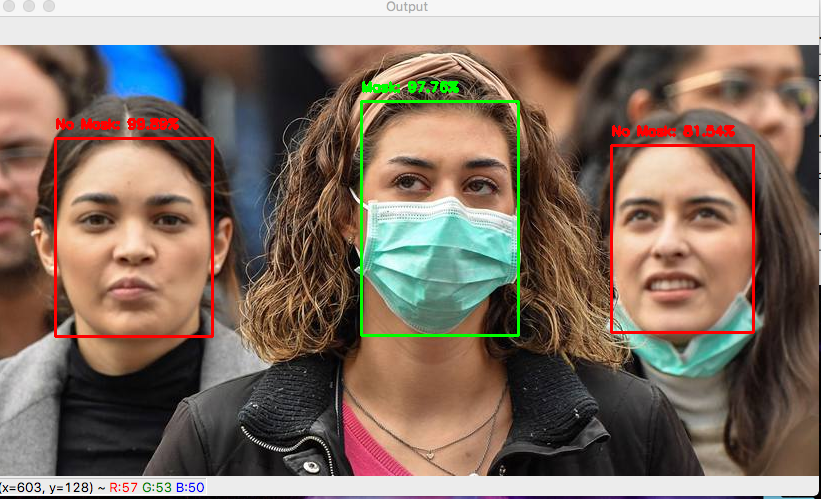

**Social distancing**, also called **“physical distancing,”** means keeping a safe space between yourself and other people who are not from your household.

To practice social or physical distancing, stay at least 6 feet (about 2 arm lengths) from other people who are not from your household in both indoor and outdoor spaces.

**Objective** is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if people vilating social distancing norms.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('mask'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

mask\haarcascade_frontalface_default.xml
mask\annotations\maksssksksss0.xml
mask\annotations\maksssksksss1.xml
mask\annotations\maksssksksss10.xml
mask\annotations\maksssksksss100.xml
mask\annotations\maksssksksss101.xml
mask\annotations\maksssksksss102.xml
mask\annotations\maksssksksss103.xml
mask\annotations\maksssksksss104.xml
mask\annotations\maksssksksss105.xml
mask\annotations\maksssksksss106.xml
mask\annotations\maksssksksss107.xml
mask\annotations\maksssksksss108.xml
mask\annotations\maksssksksss109.xml
mask\annotations\maksssksksss11.xml
mask\annotations\maksssksksss110.xml
mask\annotations\maksssksksss111.xml
mask\annotations\maksssksksss112.xml
mask\annotations\maksssksksss113.xml
mask\annotations\maksssksksss114.xml
mask\annotations\maksssksksss115.xml
mask\annotations\maksssksksss116.xml
mask\annotations\maksssksksss117.xml
mask\annotations\maksssksksss118.xml
mask\annotations\maksssksksss119.xml
mask\annotations\maksssksksss12.xml
mask\annotations\maksssksksss120.xml
mask

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2988.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2263.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2427.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5383.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2790.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3565.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2425.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5762.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/855.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1476.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2351.png
/kaggle/input/face-mask-12k-image

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1891.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3963.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5697.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2260.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1024.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/4897.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1042.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2024.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3909.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1378.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/15.png
/kaggle/input/face-mask-12k-images

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_850_3888270.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_348_5679704.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_684_3026577.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_640_6283500.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_290_2810702.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_272_1257404.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_680_2431803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_79_948721.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1231.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_436_2899816.png

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_3814767.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_608_1539846.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_112_1767118.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_491_1132819.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/585.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_422_1862415.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_292_6710394.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_878_3452056.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_280_3927738.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_5137229.pn

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_173_5723779.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1644.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_193_9420360.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_491_9931902.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_312_6269835.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_582_4227160.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_166_3999714.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_6683297.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_583_5878581.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_417_642739.pn

### Using haar cascade to detect faces

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image.

In [2]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('D:\Computer Vision Garapan\mask\haarcascade_frontalface_default.xml')

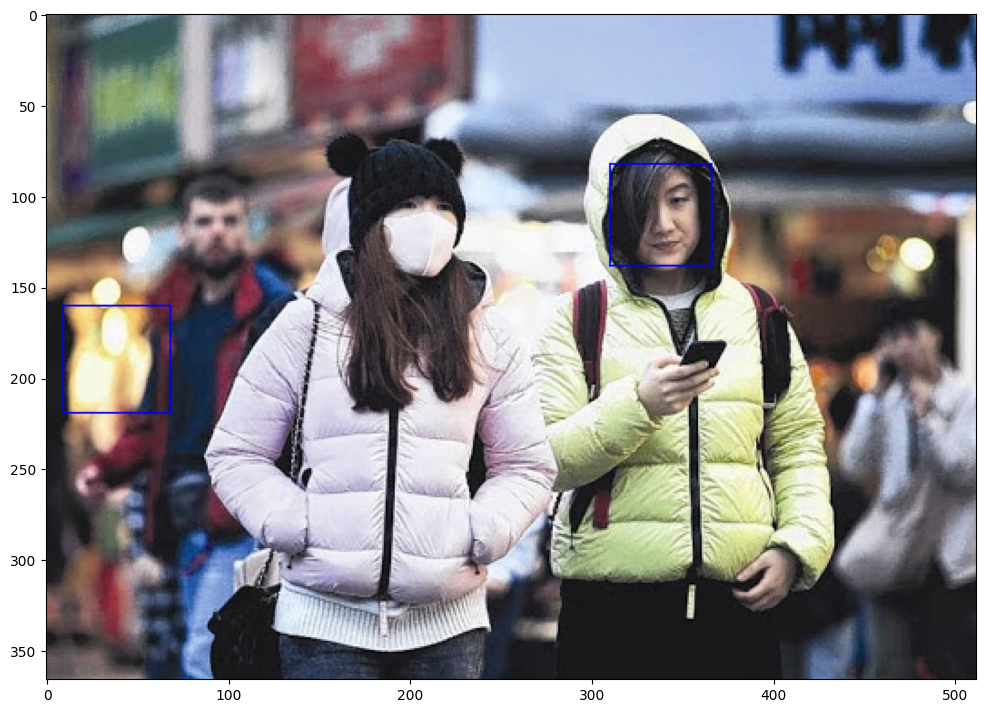

In [3]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('mask\images\maksssksksss0.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

### Detecting social distancing violations

This can be done by iterating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually initialized in such a way that it corresponds to the minimum allowable distance in real life (ex. 6ft in India).

In [4]:
MIN_DISTANCE = 130

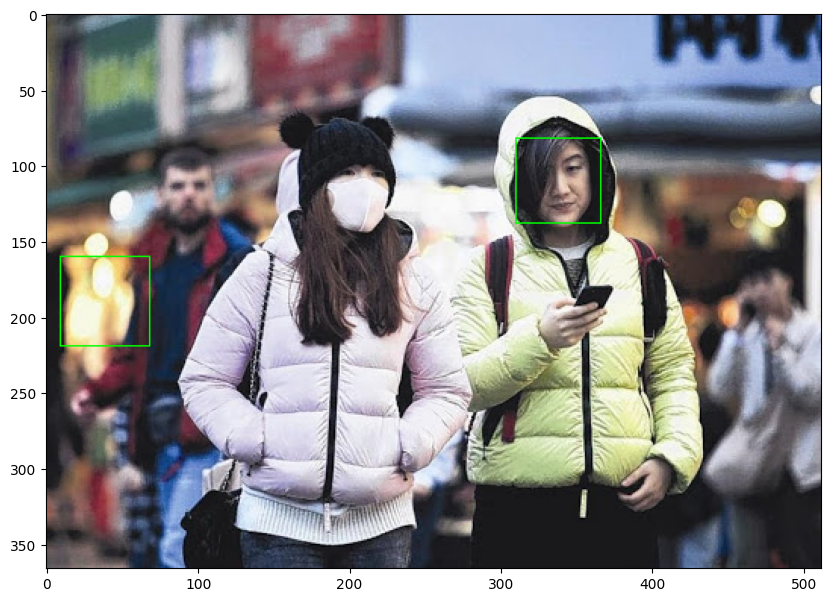

In [5]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

#### Red box shows violation of social distancing.

### Using VGG19 for mask detection


In [6]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Load train and test set
train_dir = 'Face Mask Dataset/train'
test_dir = 'Face Mask Dataset/Test'
val_dir = 'Face Mask Dataset/Validation'

In [8]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Building VGG19 transfer learning model.

In [9]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator)//32, epochs=20,validation_data=val_generator, validation_steps=len(val_generator)//32)

Epoch 1/20


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 181s 20s/step - accuracy: 0.6020 - loss: 0.7175 - val_accuracy: 0.7925 - val_loss: 0.3998
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 212s 26s/step - accuracy: 0.8619 - loss: 0.3093 - val_accuracy: 0.9187 - val_loss: 0.1959
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 161s 20s/step - accuracy: 0.9379 - loss: 0.1821 - val_accuracy: 0.9287 - val_loss: 0.1700
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 193s 23s/step - accuracy: 0.9432 - loss: 0.1484 - val_accuracy: 0.9425 - val_loss: 0.1450
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 175s 21s/step - accuracy: 0.9603 - loss: 0.1233 - val_accuracy: 0.9400 - val_loss: 0.1477
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 169s 21s/step - accuracy: 0.9639 - loss: 0.1015 - val_accuracy: 0.9538 - val_loss: 0.1237
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 160s 19s/step - accuracy: 0.9525 - loss: 0.1453 - val_accuracy: 0.9588 - val_loss: 0.1083
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 159s 19s/step - accuracy: 0.9590 - loss: 0.1067 - val_accuracy: 0.9638 - val_loss: 0.1117
Epo

In [18]:
model.evaluate_generator(test_generator)

[0.06896067410707474, 0.9800000190734863]

Our modela achieved 98% accuracy on test data.

### Testing the model on the test data

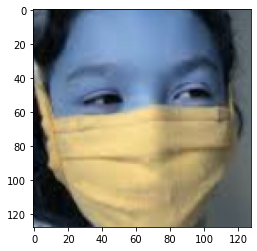

In [13]:
sample_mask_img = cv2.imread('Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [14]:
model.predict(sample_mask_img)

array([[0.9832575 , 0.13589811]], dtype=float32)

The model is able to classify if the person is wearing a mask or not.

### Save the model.

In [15]:
model.save('masknet.h5')

### Integrating with haar cascade

We now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces have a mask or not.

In [16]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

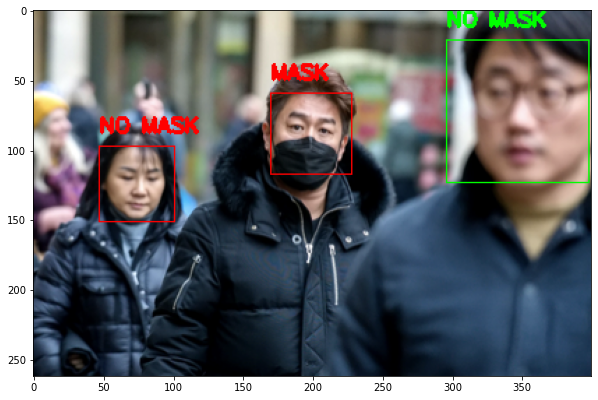

In [21]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

#### Red boxes shows violation of social distancing.